## PowerSpec diags

compute  vorticity spectra  and save outputs for later plot

# Load packages

In [1]:
## standart libraries
import os,sys
import numpy as np

from scipy.signal import argrelmax
from scipy.stats import linregress

# xarray
import xarray as xr

# plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# custom tools
import lib_medwest60 as slx

%matplotlib inline 

In [2]:
# Adekunle's PowerSPec module: https://github.com/adeajayi-kunle/PowerSpec
import sys
sys.path.insert(0,'/linkhome/rech/genige01/regi915/PYGIT/powerspec/powerspec')
import powerspec as ps
#import Plot_PowerSpec as pp

In [3]:
diro='/gpfsstore/rech/egi/regi915/MEDWEST60/DIAGS/SPVORT/'

## Read curl data (ensemble experiments)

In [4]:
varna="socurl"
typ="curl-2D"
naexp="NO"
CONFIGCASE='MEDWEST60-GSL19'
ens='ens01'
exp=ens
machine='JZ'
NMBtot=20
nav_lat_ref,nav_lon_ref,mask,curl,varname,latexvarname=slx.readallmbs(machine=machine,NMBtot=NMBtot,typ=typ,varna=varna,CONFIGCASEmed=CONFIGCASE,ens=ens)
curl.attrs['experiment_short_name'] =  naexp
maskmap = mask.isel(z=0).squeeze()
maskref=maskmap

/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/curl-2D/
001MEDWEST60-GSL19-ens01_1h_*curl-2D_*.nc
/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/curl-2D/
002MEDWEST60-GSL19-ens01_1h_*curl-2D_*.nc
/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/curl-2D/
003MEDWEST60-GSL19-ens01_1h_*curl-2D_*.nc
/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/curl-2D/
004MEDWEST60-GSL19-ens01_1h_*curl-2D_*.nc
/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/curl-2D/
005MEDWEST60-GSL19-ens01_1h_*curl-2D_*.nc
/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/curl-2D/
006MEDWEST60-GSL19-ens01_1h_*curl-2D_*.nc
/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/curl-2D/
007MEDWEST60-GSL19-ens01_1h_*curl-2D_*.nc
/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/curl-2D/
008MEDWEST60-GSL19-ens01_1h_*curl-2D_*.nc
/gpfsstore/rech/egi/commun/MEDWEST60/MEDWEST60-GSL19-S/ens01/1h/curl-2D/
009MEDW

In [5]:
curl

<xarray.DataArray 'socurl' (e: 20, time_counter: 1440, y: 803, x: 883)>
dask.array<concatenate, shape=(20, 1440, 803, 883), dtype=float32, chunksize=(1, 24, 803, 883), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2010-02-06T00:30:00 ... 2010-...
Dimensions without coordinates: e, y, x
Attributes:
    units:                  s-1
    valid_min:              -1000.0
    valid_max:              1000.0
    long_name:              Relative_Vorticity (curl)
    short_name:             socurl
    iweight:                1
    online_operation:       N/A
    axis:                   TYX
    savelog10:              0.0
    experiment_short_name:  NO

## Define squared regions 
See maps below

In [6]:
Lregion=[454,804,176,526]

## Compute and plot power spectrum

* Select a (predefined) region

In [7]:
region=Lregion

reg='region0'
nav_lon = nav_lon_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
nav_lat = nav_lat_ref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
maskreg = maskref.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
curlreg = curl.isel(x=slice(region[0],region[1]),y=slice(region[2],region[3]))
curlreg

<xarray.DataArray 'socurl' (e: 20, time_counter: 1440, y: 350, x: 350)>
dask.array<getitem, shape=(20, 1440, 350, 350), dtype=float32, chunksize=(1, 24, 350, 350), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2010-02-06T00:30:00 ... 2010-...
Dimensions without coordinates: e, y, x
Attributes:
    units:                  s-1
    valid_min:              -1000.0
    valid_max:              1000.0
    long_name:              Relative_Vorticity (curl)
    short_name:             socurl
    iweight:                1
    online_operation:       N/A
    axis:                   TYX
    savelog10:              0.0
    experiment_short_name:  NO

## PSD for each member and each time step (1 every 6 hours)

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

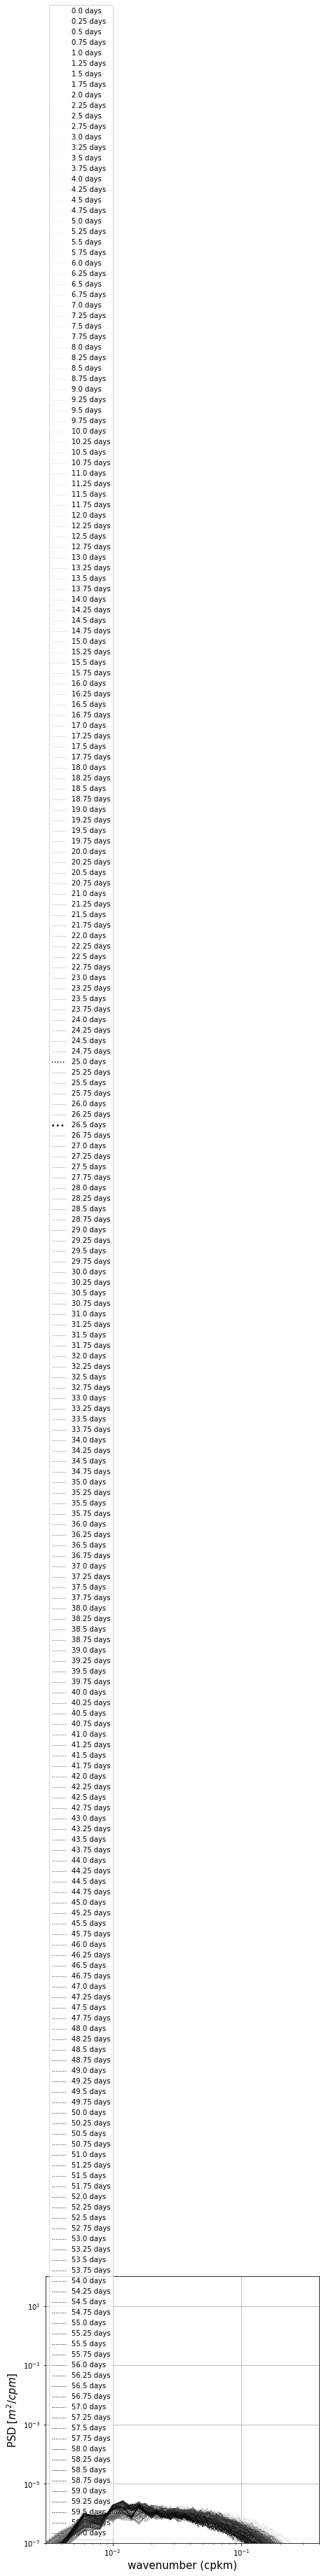

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

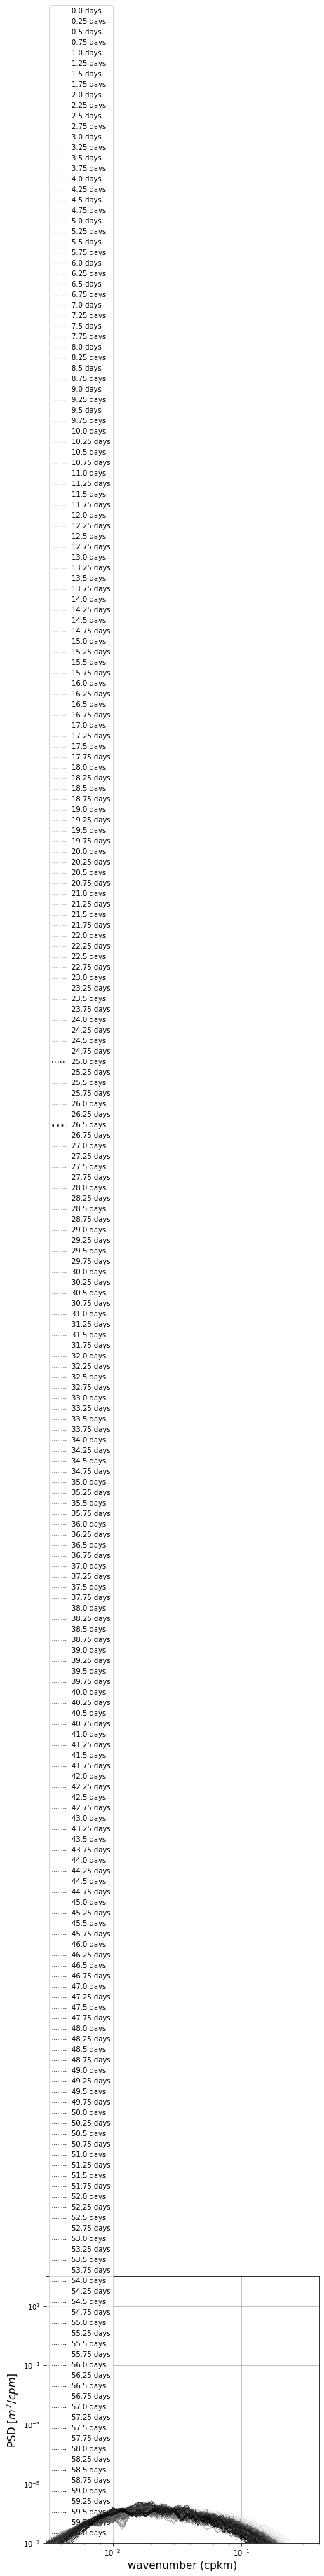

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

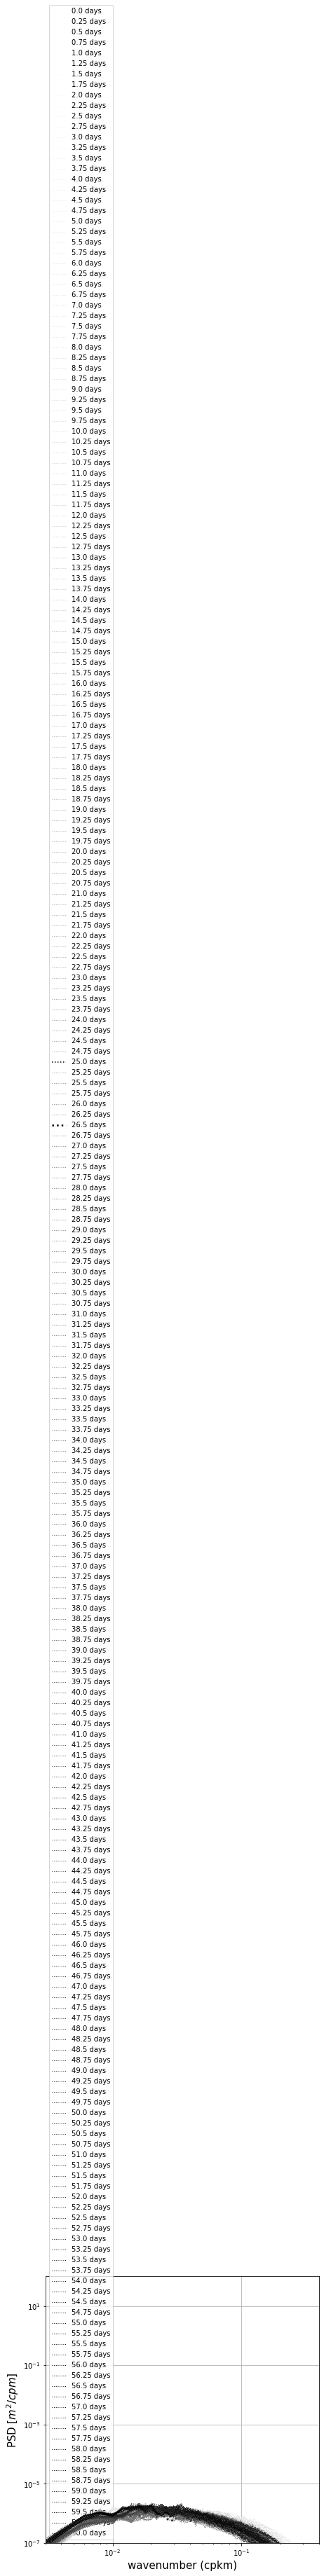

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

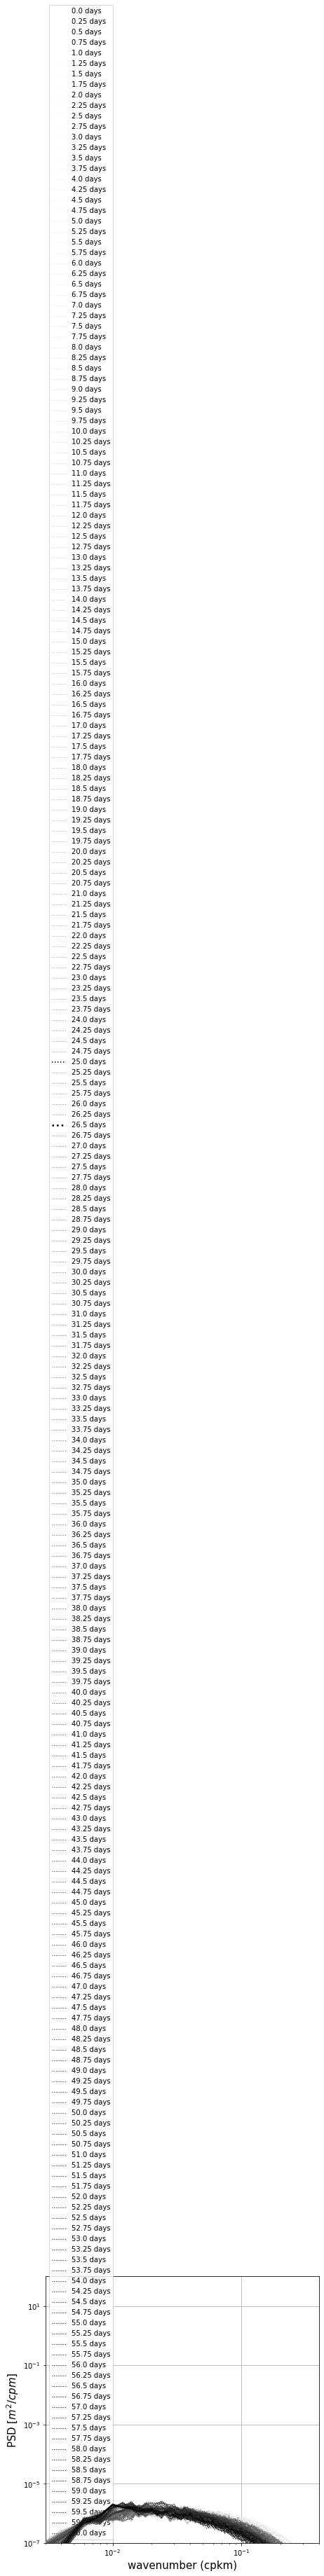

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

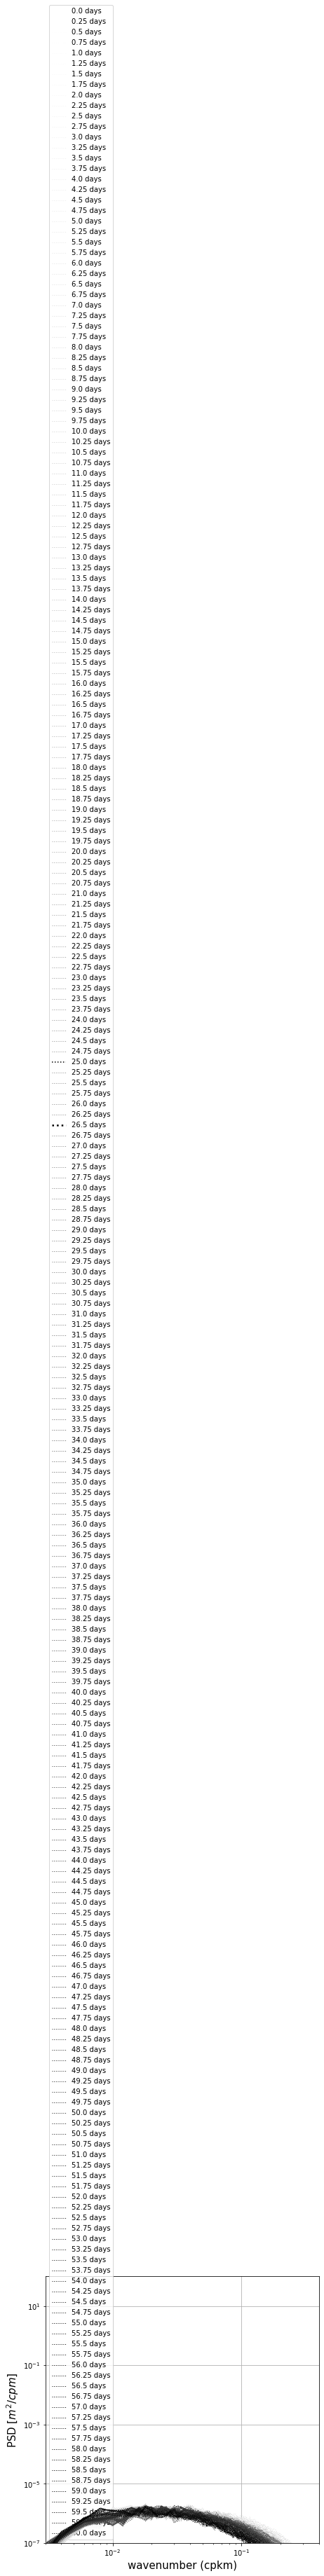

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

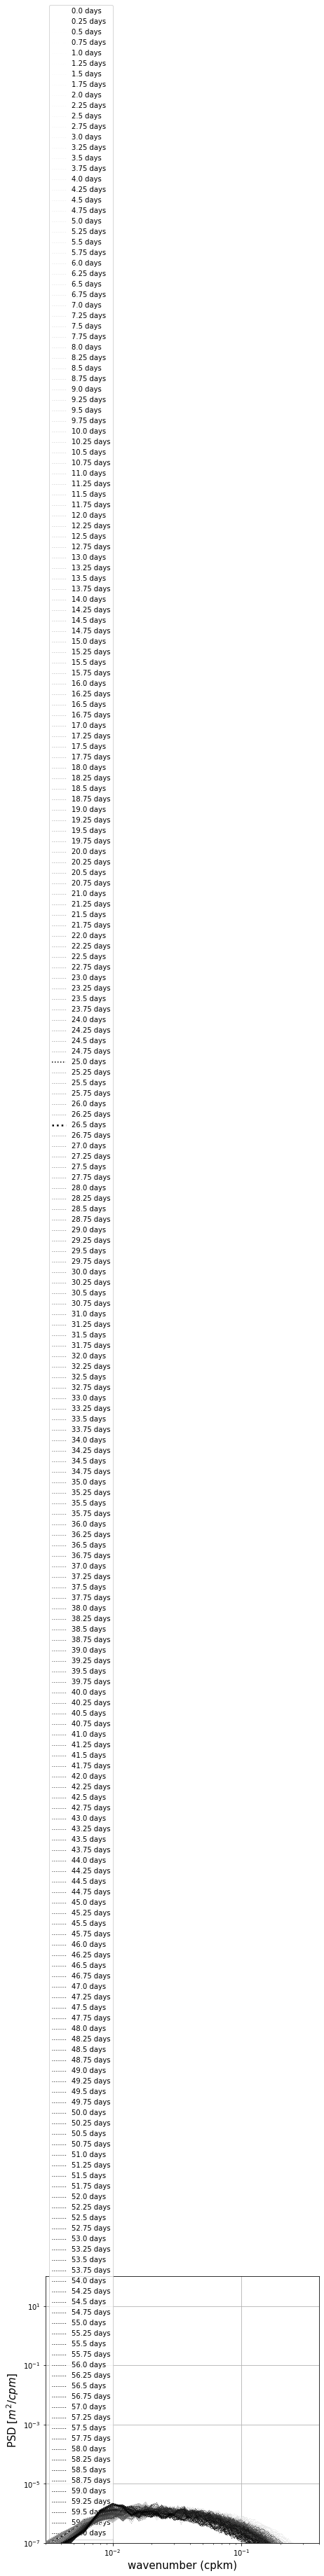

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

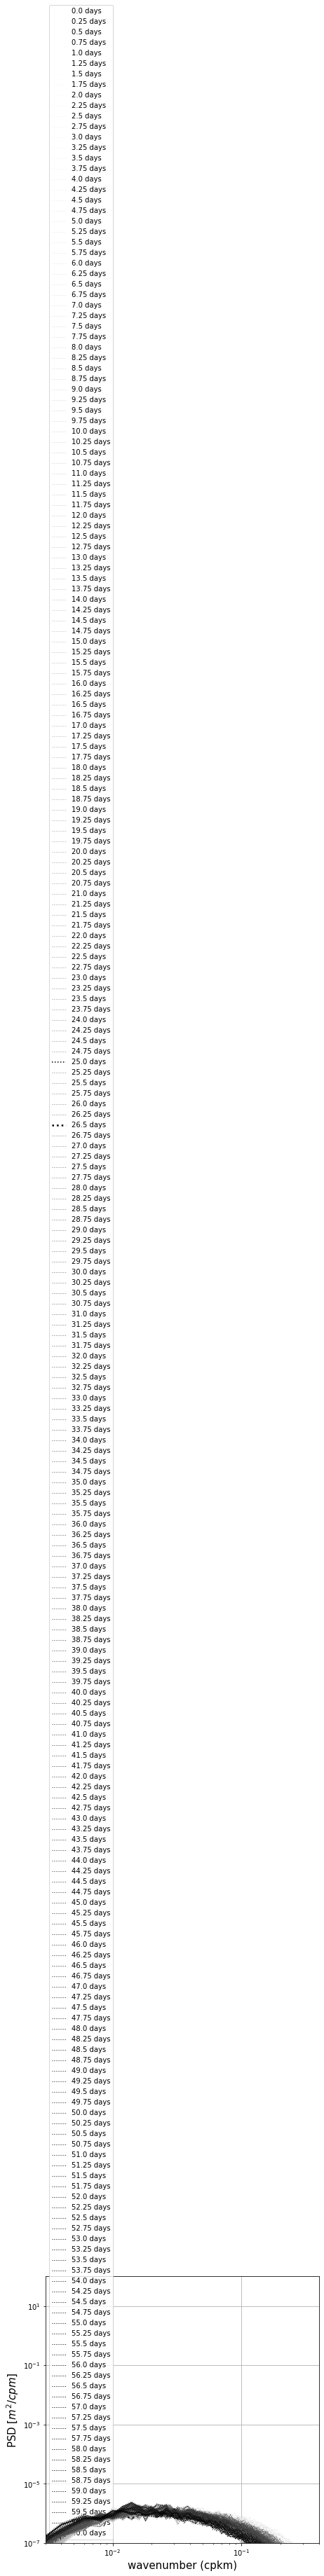

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

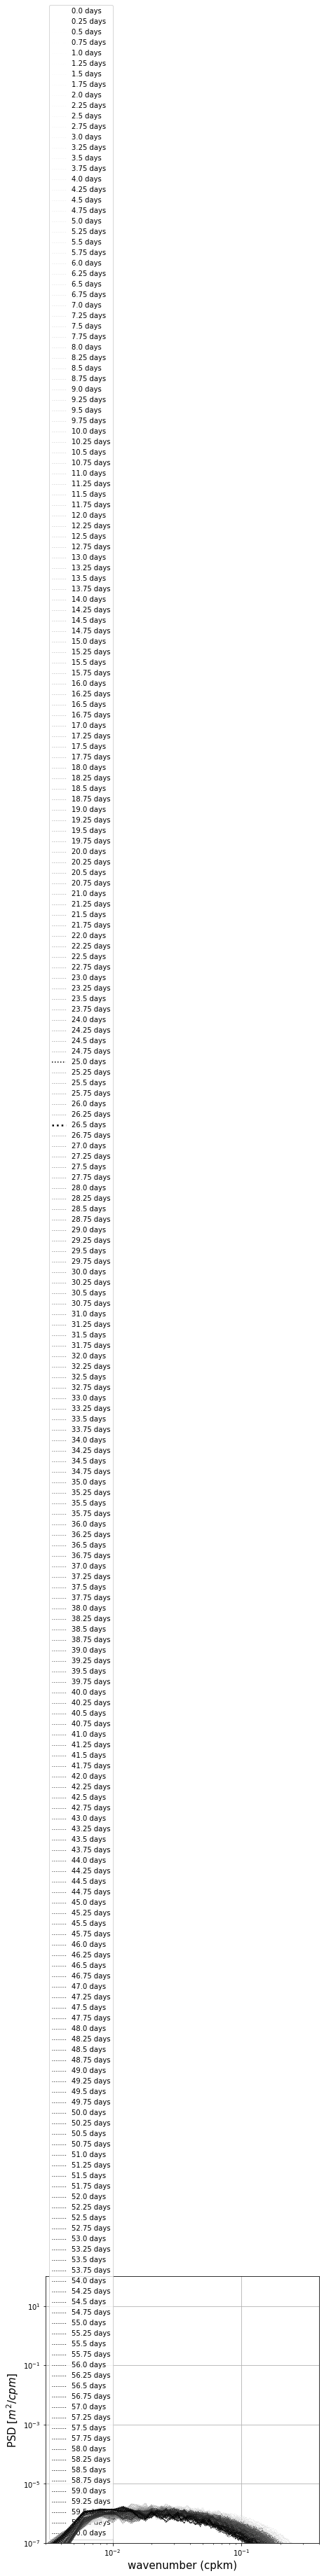

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

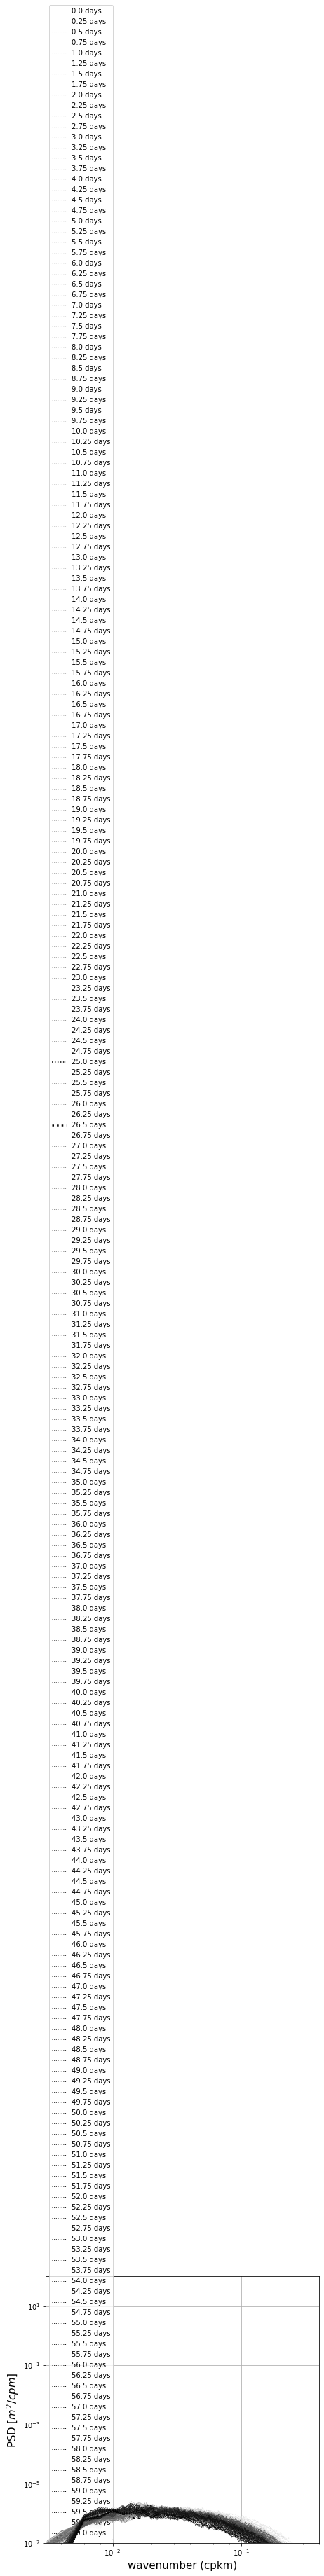

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

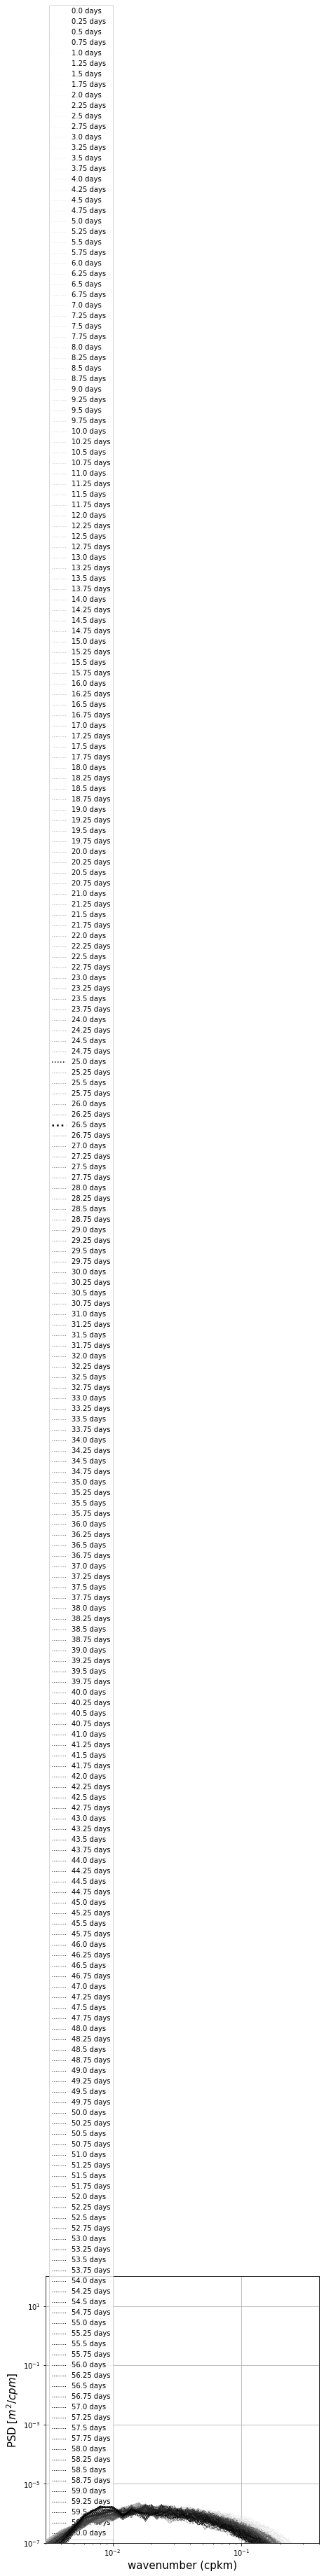

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

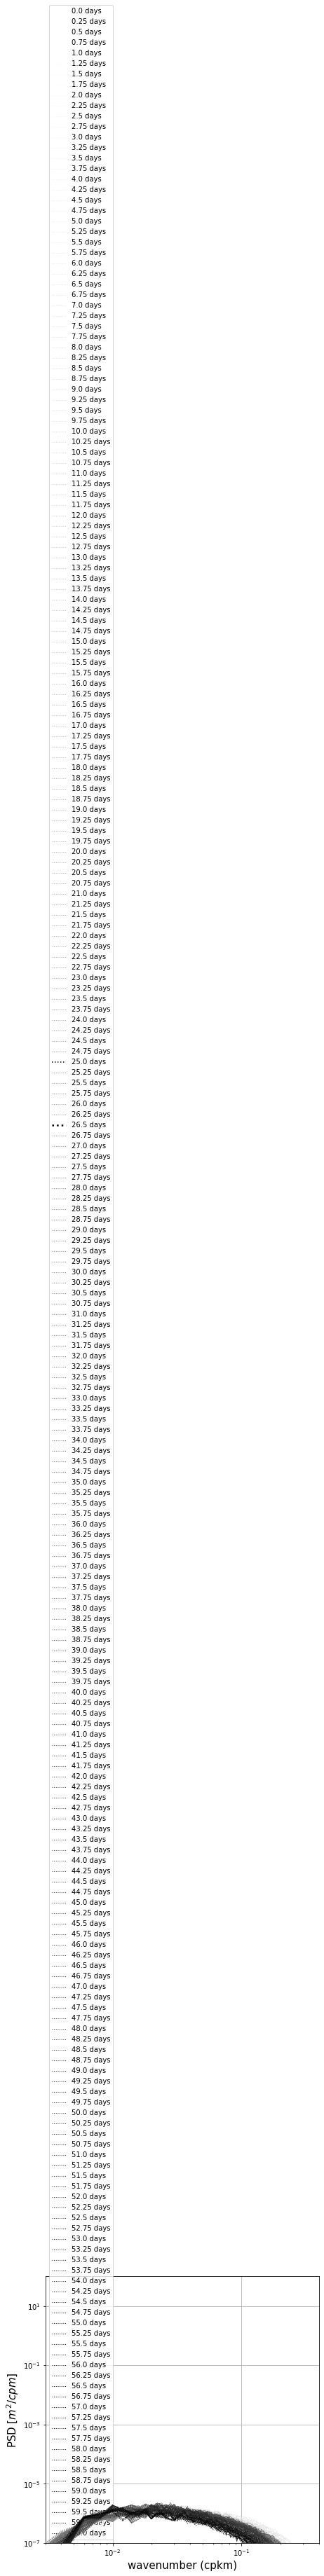

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

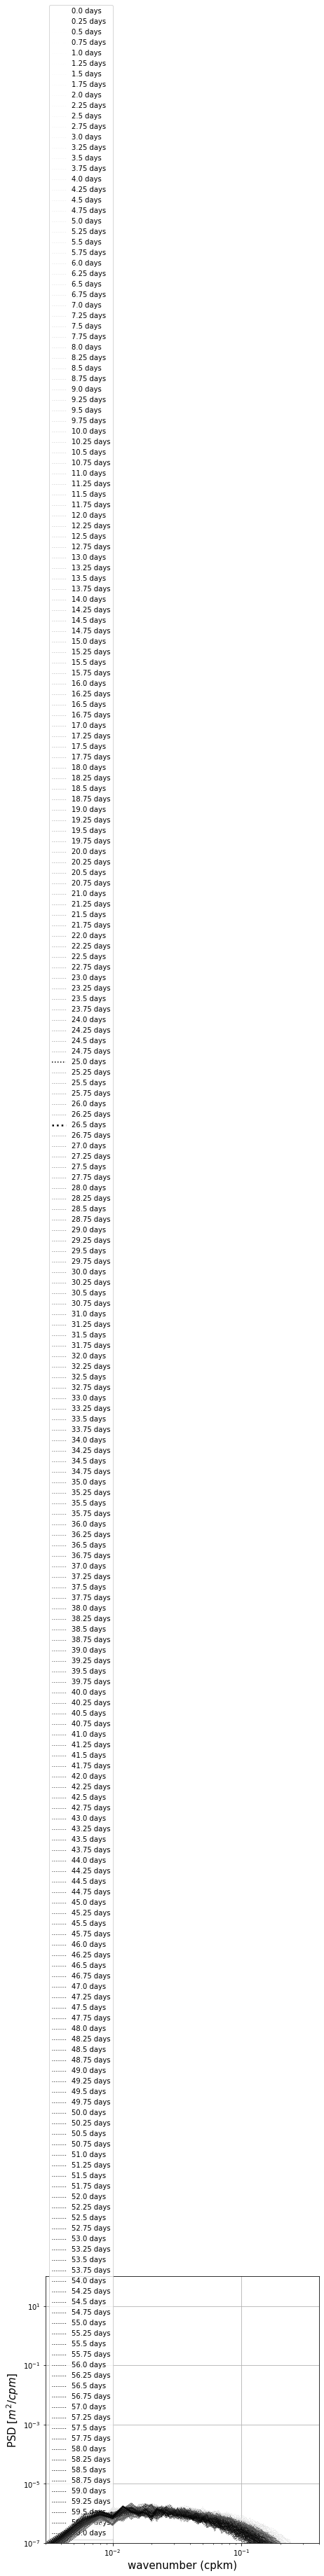

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

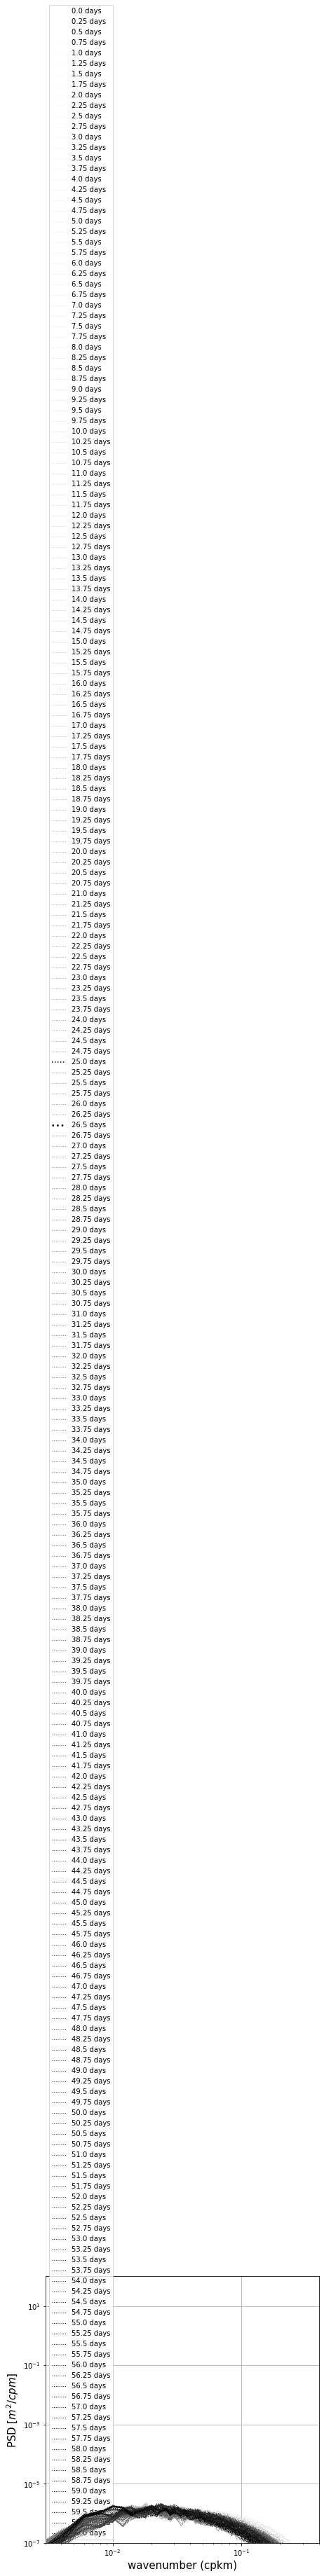

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

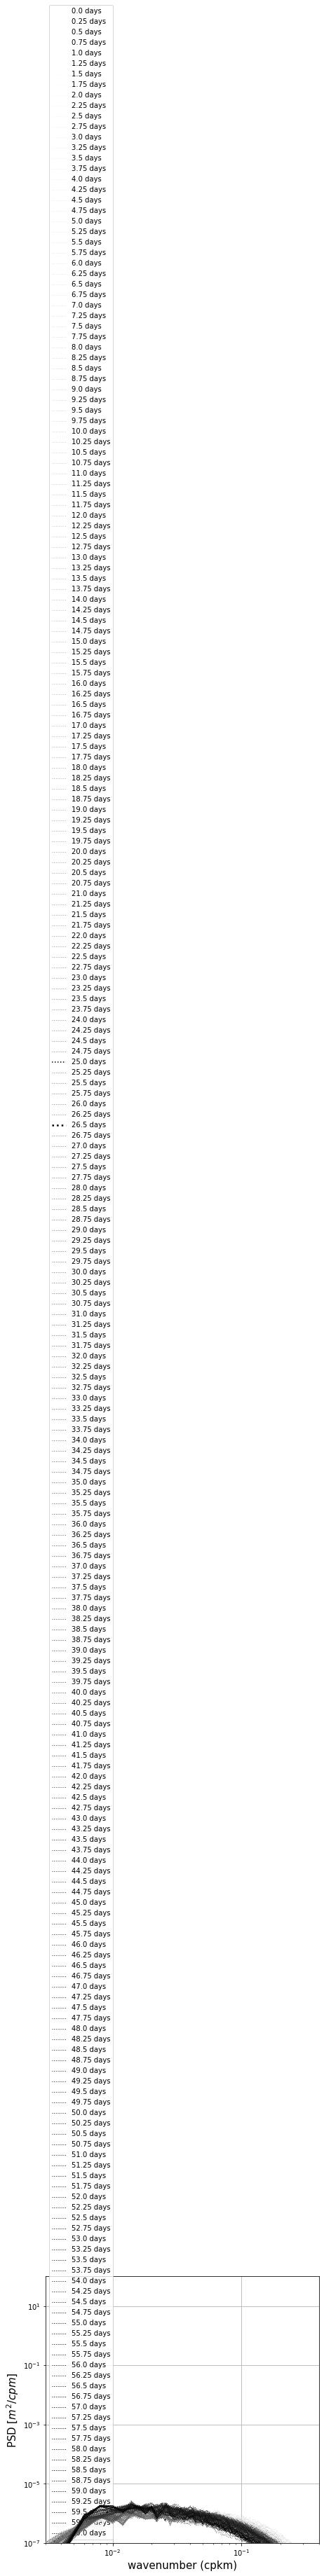

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

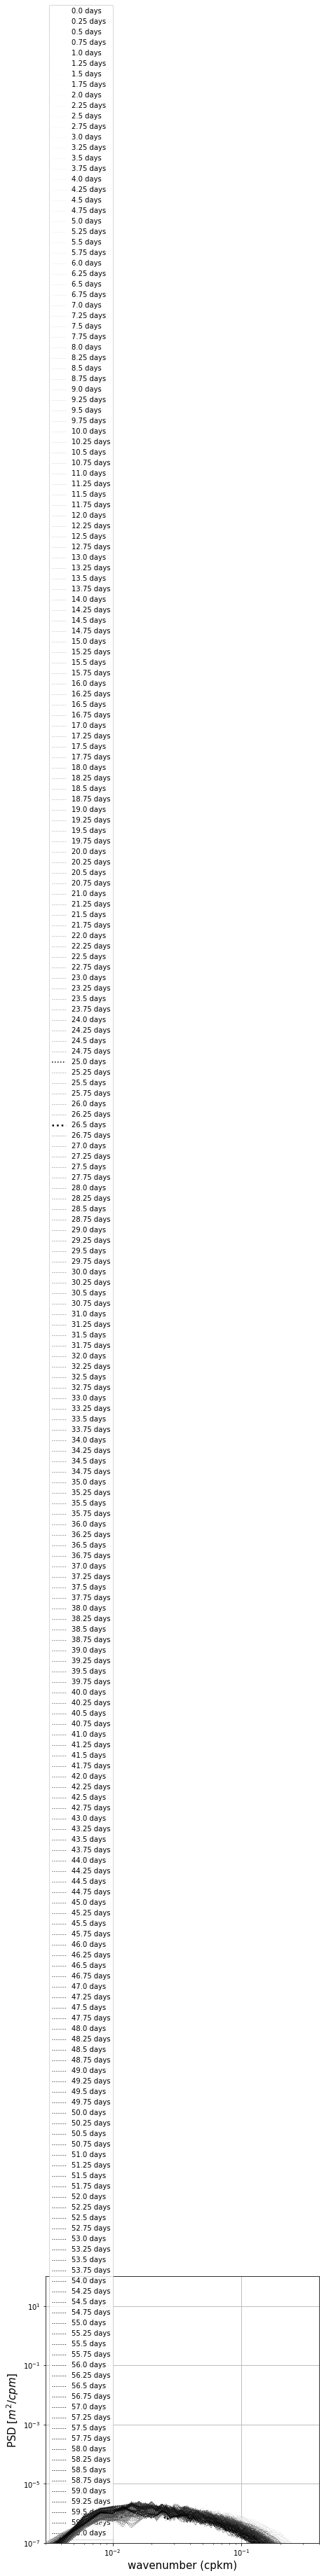

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

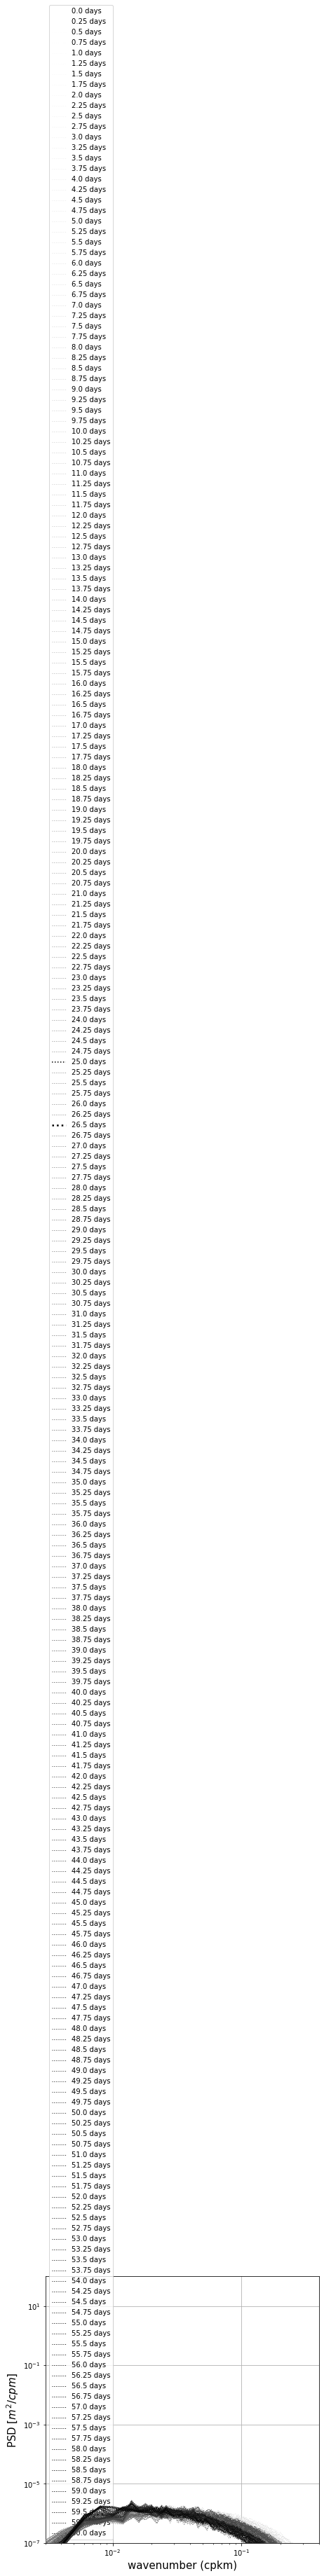

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

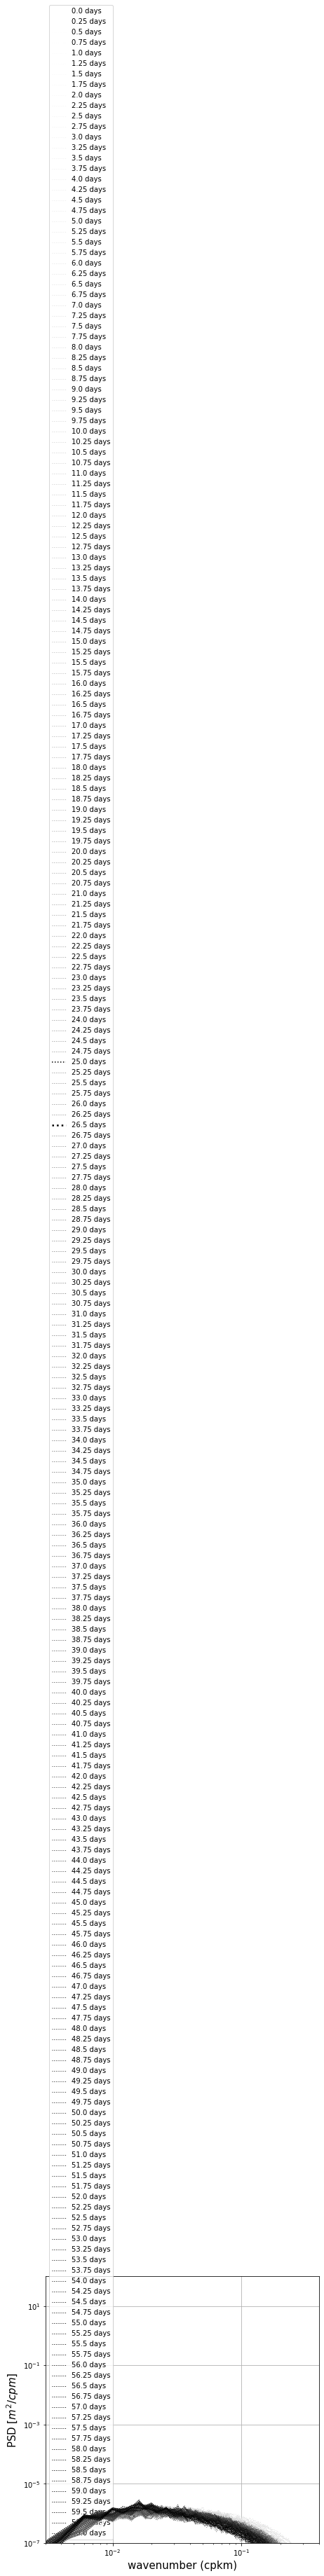

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

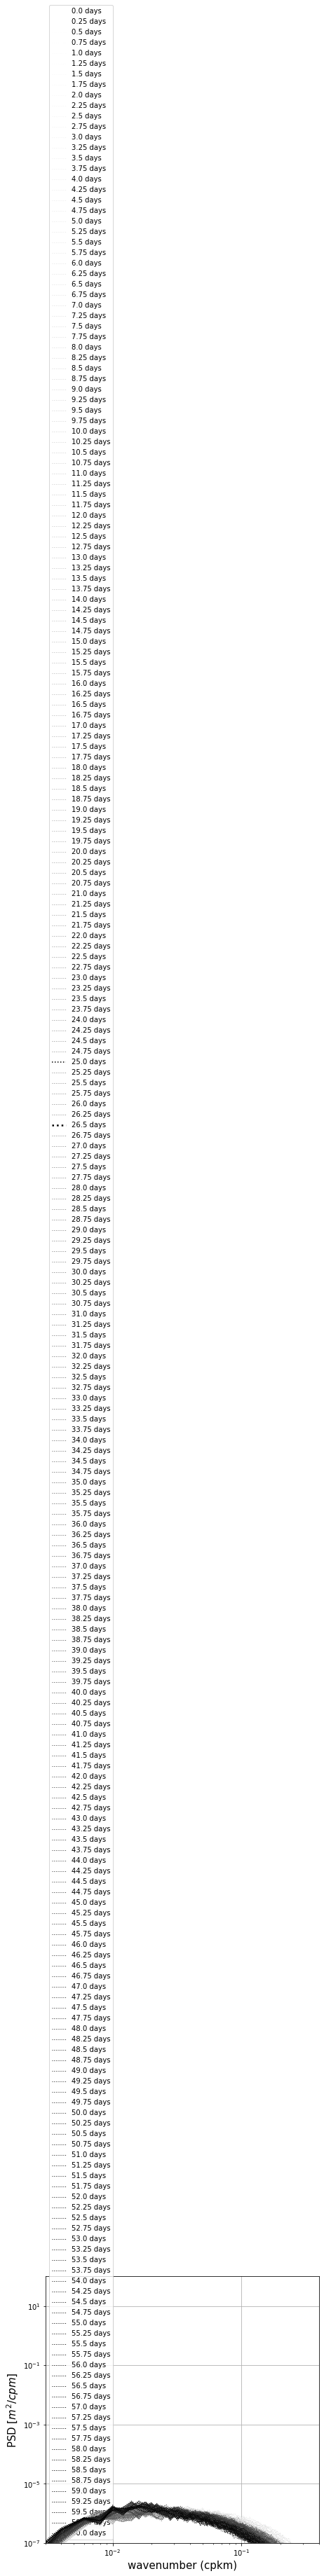

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

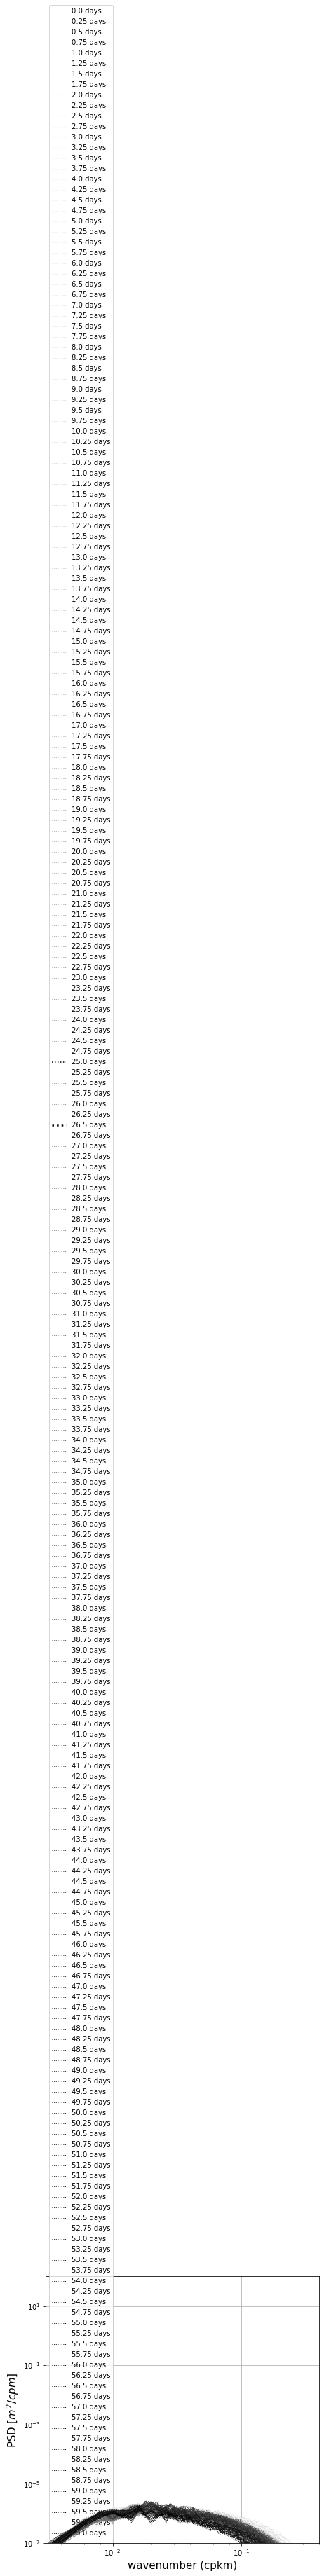

--------0
--------5
--------11
--------17
--------23
--------29
--------35
--------41
--------47
--------53
--------59
--------65
--------71
--------77
--------83
--------89
--------95
--------101
--------107
--------113
--------119
--------125
--------131
--------137
--------143
--------149
--------155
--------161
--------167
--------173
--------179
--------185
--------191
--------197
--------203
--------209
--------215
--------221
--------227
--------233
--------239
--------245
--------251
--------257
--------263
--------269
--------275
--------281
--------287
--------293
--------299
--------305
--------311
--------317
--------323
--------329
--------335
--------341
--------347
--------353
--------359
--------365
--------371
--------377
--------383
--------389
--------395
--------401
--------407
--------413
--------419
--------425
--------431
--------437
--------443
--------449
--------455
--------461
--------467
--------473
--------479
--------485
--------491
--------497
--------503

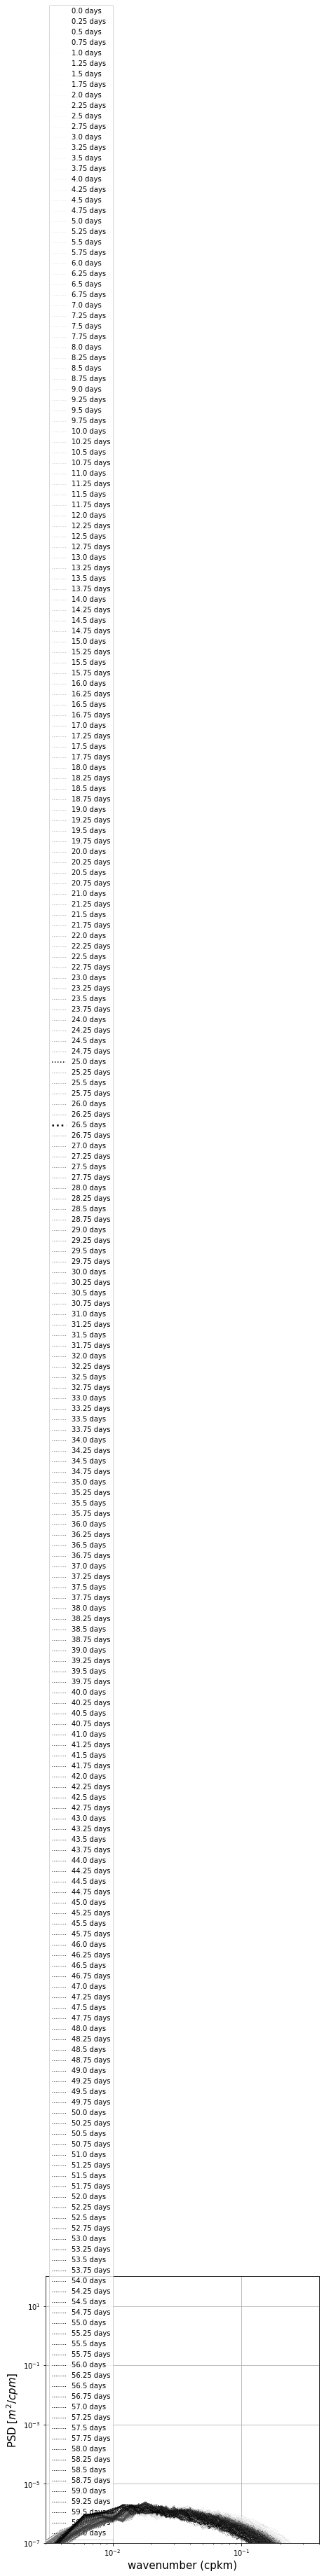

In [17]:
#========= Parameters ===============
DT=1
Nmtot=20
dtt = 6 #hours

#========= Plot settings ===============
levbounds=[0,6+4,1]
dpifig=300
# customed colormap
cmap,norm = slx.mycolormap(levbounds,cm_base='hot_r',cu='k',co='b')

# loop on members
for imref in range(0,Nmtot):
            print("======")
            print("====== mb: "+str(imref+1))
            print("======")
            print("======")
            namo='SPCURL60ev'+str(dtt)+'h_DT'+str(DT)+'_mb'+str(imref+1)+'_'+CONFIGCASE+'-'+ens+'_'+reg

            plto='plt'+namo

            # loop on time (every 6 hours here)
            icount=-1
            #for itt in range(0,721,6*1):
            for itt in range(0,1441,dtt*1):
                it =itt-1
                if it<0:
                    it=0
                icount = icount+1
                print('--------'+str(it))
                # - compute daily spectra then computer average

                _psd = []
 
                curlsp = curlreg[imref,it:it+DT,:,:].where(maskreg>0) 


                kTOT=len(curlsp)
                for k in range(kTOT):
                      wavenumber,psd_ = ps.wavenumber_spectra(curlsp[k].to_masked_array(),nav_lon.values,nav_lat.values) 
                      _psd.append(psd_)

                psd = np.array(_psd).mean(axis=0)

                if icount==0:
                    fig3 = plt.figure(figsize=([7,7]),facecolor='white')
                    allpsd = xr.DataArray(psd,dims=('wn'),name='psd')

                else:
                    xrpsd  = xr.DataArray(psd,dims=('wn'),name='psd')
                    allpsd = xr.concat([allpsd,xrpsd], dim='time_counter')

                    
                plotcheck=True
                if (plotcheck):    
                    # quick and dirty plot stuff to check the way it looks
                    co=((1440-it)/1441., (1440-it)/1441., (1440-it)/1441.)
                    #co=((720-it)/721., (720-it)/721., (720-it)/721.)

                    #coNO=cmap.colors[icount+2]
                    lw=1
                    lwNO=2
                    st="-"
                    zorder=100

                    if icount==100:
                        co='k'
                        lw=1.5
                        st=":"
                        lwNO=3
                        coNO='k'
                        zorder=100

                    if icount==106:
                        co='k'
                        lw=2.5
                        coNO='k'
                        lwNO='2.5'

                    if (DT>1):
                        label=str((itt+(DT/2.))/24.)+" days"
                    else:
                        label=str(itt/24.)+" days"
                    plt.loglog(1E3*wavenumber,psd,color=co,linewidth=lw,linestyle=':',label=label,zorder=100)

                    
            if (plotcheck=True):
                plt.xlim(3e-3,4e-1)
                plt.ylim(1e-7,1e2)
                plt.xlabel('wavenumber (cpkm)',fontsize=15)
                plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
                plt.grid(True)   
                plt.legend()
                plt.show()
                # Save fig in png, resolution dpi    
                slx.saveplt(fig3,diro,plto,dpifig=300)


            # save data for later use
            savedata=True
            if savedata:

                dataprint = xr.DataArray(allpsd.values, dims=('time_counter', 'wn'),coords={'time_counter':np.arange(0,60.25,0.25)})
            
                outfi = 'dat'+namo+'.nc'

                dataprint.name = 'psd'
                dataprint.attrs['long_name'] =  "psd"
                dataprint.attrs['mb']=imref+1
                dataprint.to_netcdf(diro+outfi,mode='w')

                xrwavenumber = xr.DataArray(wavenumber,dims=('wn'),name='wavenumber')
                xrwavenumber.name = 'wavenumber'
                xrwavenumber.attrs['long_name'] =  "wavenumber cpm"
                xrwavenumber.to_netcdf(diro+outfi,mode='a')



---

# PSD of the forecast error

In [ ]:
DT=1
itstSP=1 # in days

#========= Plot settings ===============
levbounds=[0,6+4,1]
dpifig=300
# customed colormap
cmap,norm = slx.mycolormap(levbounds,cm_base='hot_r',cu='k',co='b')
#cmocean.cm.thermal_r

Nmtot=20

for imref in range(17,Nmtot):
    print("======")
    print("====== mbref: "+str(imref+1))
    print("======")
    print("======")
    for im in range(0,Nmtot):
        if (im!=imref):    
            print("====== mb: "+str(im+1))        
            namo='SPCURL60DIFF_DT'+str(DT)+'_m'+str(im+1)+'_mbref'+str(imref+1)+'_'+CONFIGCASE+'-'+ens+'_'+reg

            plto='plt'+namo


            icount=-1
            #for itt in range(0,721,24*1):
            for itt in range(0,1441,24*itstSP):
                it =itt-1
                if it<0:
                    it=0
                icount = icount+1
                print('--------'+str(it))

                _psdNO = []
      
                curli = curlreg[:,it:it+DT,:,:].where(maskreg>0) #.squeeze()   

                curldiff = curli.isel(e=im)-curli.isel(e=imref)


                kTOT=len(curldiff)
                for k in range(kTOT):
                      wavenumberNO,psdNO_ = ps.wavenumber_spectra(curldiff[k].to_masked_array(),nav_lon.values,nav_lat.values) 
                      _psdNO.append(psdNO_)

                psdNO = np.array(_psdNO).mean(axis=0)

                if icount==0:
                    fig3 = plt.figure(figsize=([7,7]),facecolor='white')
                    allpsdNO = xr.DataArray(psdNO,dims=('wn'),name='psd')

                else:
                    xrpsdNO  = xr.DataArray(psdNO,dims=('wn'),name='psd')
                    allpsdNO = xr.concat([allpsdNO,xrpsdNO], dim='time_counter')

                pltcheck=True
                if pltcheck:
                    co=((1440-it)/1441., (1440-it)/1441., (1440-it)/1441.)
                    #co=((720-it)/721., (720-it)/721., (720-it)/721.)
                    coNO=co
                    #coNO=cmap.colors[icount+2]
                    lw=1
                    lwNO=2
                    st="-"
                    zorder=100

                    if (DT>1):
                        label=str((itt+(DT/2.))/24.)+" days"
                    else:
                        label=str(itt/24.)+" days"

                    plt.loglog(1E3*wavenumberNO,psdNO,color=coNO,linewidth=lwNO,linestyle=':',label=label,zorder=100)


            if pltcheck:
                plt.xlim(3e-3,4e-1)
                plt.ylim(1e-7,1e2)
                plt.xlabel('wavenumber (cpkm)',fontsize=15)
                plt.ylabel('PSD '+r'[$m^2/cpm$]',fontsize=15)
                plt.grid(True)   
                plt.legend()
                plt.show()

                # Save fig in png, resolution dpi    
                slx.saveplt(fig3,diro,plto,dpifig=300)



            savedata=True
            if savedata:
                
                dataprint = xr.DataArray(allpsdNO.values, dims=('time_counter', 'wn'),coords={'time_counter':np.arange(0,61,1)})

                outfi = 'dat'+namo+'.nc'

                dataprint.name = 'psd'
                dataprint.attrs['long_name'] =  "psd"
                dataprint.attrs['mb']=im
                dataprint.attrs['mbref']=imref
                dataprint.to_netcdf(diro+outfi,mode='w')

                xrwavenumber = xr.DataArray(wavenumberNO,dims=('wn'),name='wavenumber')
                xrwavenumber.name = 'wavenumber'
                xrwavenumber.attrs['long_name'] =  "wavenumber cpm"
                xrwavenumber.to_netcdf(diro+outfi,mode='a')



====== mbref: 18
====== mb: 1
--------0
--------23
--------47
--------71
--------95
--------119
--------143
--------167
--------191
--------215
--------239
--------263
--------287
--------311
--------335
--------359
--------383
--------407
--------431
--------455
--------479
--------503
--------527
--------551
--------575
--------599
--------623
--------647
--------671
--------695
--------719
--------743
--------767
--------791
--------815
--------839
--------863
--------887
--------911
--------935
--------959
--------983
--------1007
--------1031
--------1055
--------1079
--------1103
--------1127
--------1151
--------1175
--------1199
--------1223
--------1247
